In [54]:
import tensorflow as tf 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os 
import csv 
import numpy as np
import seaborn as sns 

In [4]:
bt_data = pd.read_csv("bt_dataset.csv")

In [74]:
bt_data.head(7)

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.46,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.46,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059167,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.46,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.46,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.46,97.639870,0.766308,0.184878,0.000000,0
5,Image6,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,7.46,inf,NaN,0.000000,NaN,0
6,Image7,11.350555,998.972243,31.606522,0.761106,2.533920,7.394586,303.947978,0.854277,0.729789,0.902355,3.440551,0.866480,7.46,99.206579,0.794881,0.128889,0.000000,0


In [76]:
bt_data.isnull().sum()

Image                   0
Mean                    0
Variance                0
Standard Deviation      0
Entropy                 0
Skewness              369
Kurtosis              369
Contrast                0
Energy                  0
ASM                     0
Homogeneity             0
Dissimilarity           0
Correlation             0
Coarseness              0
PSNR                    0
SSIM                  369
MSE                     0
DC                     98
Target                  0
dtype: int64

In [7]:
print(bt_data.shape)

(1644, 19)


In [18]:
dfdata = bt_data

In [21]:
dfdata = dfdata.drop(['Image'], axis=1)

In [22]:
dfdata.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.46,97.974630,0.777011,0.171163,0.303989,1
1,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.46,110.346597,0.977953,0.009913,0.839019,1
2,3.244263,642.059167,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.46,112.266298,0.985362,0.006372,0.849775,1
3,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.46,101.955792,0.881015,0.068437,0.000000,0
4,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.46,97.639870,0.766308,0.184878,0.000000,0


In [45]:
list(bt_data.keys())

['Image',
 'Mean',
 'Variance',
 'Standard Deviation',
 'Entropy',
 'Skewness',
 'Kurtosis',
 'Contrast',
 'Energy',
 'ASM',
 'Homogeneity',
 'Dissimilarity',
 'Correlation',
 'Coarseness',
 'PSNR',
 'SSIM',
 'MSE',
 'DC',
 'Target']

In [47]:
dfdata = dfdata.replace([np.inf, -np.inf], np.nan)
dfdata = dfdata.fillna(dfdata.mean())

feature_columns = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 
                   'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE', 'DC']

y = dfdata['Target']  # the label 
X = dfdata[feature_columns]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred=log_reg.predict(X_test)

In [51]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[  1,  34],
       [  1, 293]])

Text(0.5, 257.44, 'Predicted label')

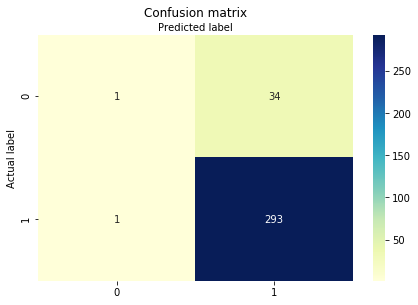

In [56]:
class_names=[0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8936170212765957
Precision: 0.8960244648318043
Recall: 0.9965986394557823


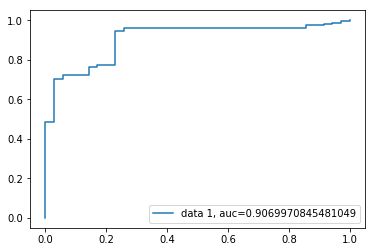

In [103]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [229]:
sample = X_test.iloc[8]

In [231]:
y_pred1=log_reg.predict(X_test[7:8])

In [232]:
y_pred1

array([1])

In [233]:
y_test.iloc[17]

1